In [1]:
from PyCol.col import COL
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt

UNITY_EXE = "./BUILDS/demo/unix/COL.x86_64"
#UNITY_EXE = None
LOG_DIR   = "./logs"

config = {
    'IMG_SIZE': 512,
    'speed_factor': 1,
    'spawn_pedestrians': 0,
    'spawn_cars': 0,
    'move_speed': 2,
    'turn_speed': 0.015,
    'vertical_speed': 1,
    'momentum': 0,
    'fixedDeltaTime': 0.0005,#0.02,#0.0005,
    'number_of_steps': 1,
    'rgb_camera': 1,
    'depth_camera': 0,
    'normals_camera': 0,
    'semantic_camera': 0,
    'vertical_fov': 90,
    'start_x': -2528.0,
    'start_y': 0.1,
    'start_z': -74.0,
    'launch_streaming': 0,
    'render': 0,
}

col = COL(UNITY_EXE, LOG_DIR, config,batch_mode = False)
ok = col.launch()

if ok:
    frames = col.extract_visual_frames()
    px, py, pz, rx, ry, rz = col.extract_xyz()

col.promote_chunk(557)

[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-allocator-temp-initial-block-size-main=262144"
    "memorysetup-allocator-temp-initial-block-size-worker=262144"
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler

In [2]:
#col.promote_chunk(557)
#col.write_action_until_frame(0,0,1,0)
#x,_,z,_,_,_ = col.extract_xyz()
#col.move_player(x,2,z)

In [2]:
col.extract_xyz()

(-2528.0, 0.10000000149011612, -74.0, -0.0, 0.0, 0.0)

100%|████████████████████████████████████████| 100/100 [00:00<00:00, 474.03it/s]


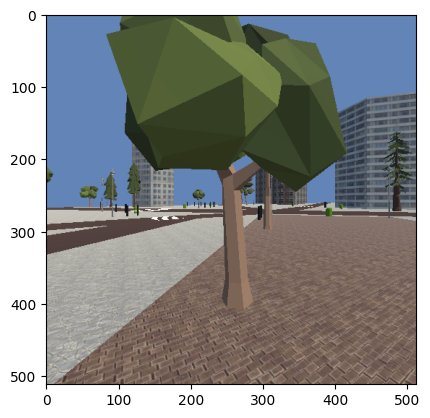

In [20]:
from tqdm import tqdm
import time
fwd, turn, vert, grav = 1,0,0,0
#f = []
for i in tqdm(range(100)):
        col.write_action_until_frame(fwd,turn,vert,grav)

plt.imshow(col.frames_shm['RGB'][::-1,:,:3])

In [17]:
#plt.imshow(frames[0]['RGB'])
N_frames = 100
fps_list = []
fwd,turn,vert,grav = 0,0,0,0
current_size = config['IMG_SIZE']
for j in tqdm(range(5)):
    t0 = time.time()
    for i in range(N_frames):
            col.write_action_until_frame(fwd,turn,vert,grav)
            #local_frame = frames[0]['RGB'].copy() #simulate numpy copy
    fps_list.append(N_frames/(time.time()-t0))
print(current_size,np.array(fps_list).mean(),np.array(fps_list).std())

100%|█████████████████████████████████████████████| 5/5 [00:01<00:00,  4.20it/s]

512 422.0336103255339 12.443477874198926
